In [71]:
# log normal  Distribution
import math
from scipy.integrate import quad
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [72]:
# function take file path and value seprator
def read_Continues_Data(file_path,sep):
        file = open(file_path,'r')
        input_list =[]
        for line in file:
            input_list.extend(line.split(sep))
            # it use to remove the \n symbol that newline starts
            a  = input_list.pop()
            input_list.append(a[:-1])

        file.close()
        list1 = [round(float(x),3) for x in input_list]
        return list1

        
    
# take list of data as input and find the mean
def mean_of_data(data):
    avg = round(sum(data)/len(data),3)
    return avg

# finding variance of data
def variance_of_data(data,avg):
    # variance for sample data (n-1)
    # variance = sum([(i-avg)**2 for i in data])/len(data)-1
    
    # variance of population (n)
    variance = sum([(i-avg)**2 for i in data])/len(data)
    
    return variance

# plot the scatter plot to understand the data distribution
def scatterPlot(data):
    x = np.array(data)
    y = x[1:]
    x = x[:-1]

    plt.scatter(x, y)
    plt.show()


# Gives the element count in given intervals
def frequency(data,l_limit,u_limit):
        ele_count = 0
        for i in data:
            if i>=l_limit and i<u_limit:
                ele_count +=1
                
        return ele_count
def freq_for_graph(data,intervals):
        min_data = min(data)
        max_data = max(data)
        interval_size = round((max_data - min_data)/intervals,3)
        dic = {}
        for i in range(intervals):
            min_data = min_data + interval_size
            rang = f"({round(min_data - interval_size,3)}-{round(min_data,3)}]"
            l_limit = min_data - interval_size
            u_limit = min_data
            dic[rang] = frequency(data,l_limit,u_limit)
    
        
        if(round(u_limit,3) <= max_data):
            dic[list(dic.keys())[-1]] += 1 
            
        
        display_Freq(dic)
        return dic
        

def display_Freq(result):
        print("      Intervals                    Frequncy  ")
        print("------------------------------------------------------------")
        for (k,v) in result.items():
            print(f"    {k}              {v}     ")
            print("------------------------------------------------------------")


        print(f"        Total                   {sum(result.values())}")
        print("------------------------------------------------------------")

# plotting the histogram
def plot_histogram(dic,intervals):
    x = [i for i in range(1,intervals+1)]
    y = list(dic.values())
    plt.bar(x, y, color='g')
    return None
    
          

In [73]:

# templete for all distributions
# def find_parameters(avg,var):
#     pass
#     return ()

# gamma distribution parameter estimation
def find_log_parameters(avg,var):
    
    
    mew  = round(math.log((avg**2)/math.sqrt(avg**2+var)),3)
    sigma_Square = round(math.sqrt(math.log(var+avg**2/avg**2)),3)
    
    return (mew,sigma_Square)
 
###### frequency table of  Obeserve frequency(Oi),expected Frequency(Ei),(chi-square(Oi-Ei)^2/Ei) ###########################

# distribution function
def log_normal_distribution(x):
#     "lambda x: (1 / (x * {sigma} * math.sqrt(2 * math.pi))) * math.exp(-((math.log(x) - {mu}) ** 2) / (2 * {sigma ** 2}))"
    pi = math.pi
#     d = math.sqrt(2*pi*sigma_square1)
# #     m = math.log(x)-meow1
    fx =  (1/(x*sigma_square1 * math.sqrt(2*pi)))*math.e**(-((math.log(x)-meow1)**2)/(2*sigma_square1**2))
    return fx


    
# calculating the area under the curve a= lower ,b= higher
def area_Under_Curve(func,a,b,n):
    # height of each small trepezium
    h = abs(b-a)/n
    area = 0 # intilization of area as 0
    
    # calculating and sum of all small-small trapeziums
    for i in range(n):
        A = a + i * h
        B = a + (i + 1) * h
        area += (func(A) + func(B)) * h / 2 

    return area



In [90]:
import random
random.randint(1,1000)

860

In [78]:

# print the frequency table of given data
def frequency_table(data,intervals):
    
        min_data = 0.001   
        max_data = max(data)
        
        interval_size = round((max_data - min_data)/intervals,3)
#         dic = {}
        Freq_table = []
        
        for i in range(intervals):
            min_data = min_data + interval_size
            
#             rang = f"({round(min_data - interval_size,3)} - {round(min_data,3)}]"
            
            l_limit = round(min_data - interval_size,3)
            u_limit = round(min_data,3)
            
            # frequency function gives the number of elements in given range 
            Oi = frequency(data,l_limit,u_limit)
            
            # function gives the area of given interval on given probability function
            area = area_Under_Curve(log_normal_distribution,l_limit,u_limit,10000)
            
            # Expected values for given interval
            Ei = area * len(data)
            
            # putting the Oi ,Ei,area,(Oi-Ei)^2/Ei, l_limit,u_limit
            Freq_table.append([Oi,Ei,area,(((Oi-Ei)**2)/Ei),l_limit,u_limit])
#             dic[rang] =[Oi,Ei,area,(((Oi-Ei)**2)/Ei),l_limit,u_limit]
    
        
        if(round(u_limit,3) <= max_data):
            for i in data :
                if i >= Freq_table[-1][-1]:  
                    Freq_table[-1][0] += 1
#             print("sum : ",sum([i[0] for i in Freq_table]))
        
            
        display(Freq_table)
        return Freq_table


# prints the frequency table
def display(result):
        print("      Intervals \t Frequncy_Oi \t expected Ei \t\t\t area  \t\t\t\t(Oi-Ei)^2/Ei  ")
       
        for item in result:
            print(f"    {item[-2]}-{item[-1]}\t\t{item[0]}\t\t{item[1]}\t\t{item[2]}\t\t{item[3]}    ")
            
        total_observations = sum([result[i][0] for i in range(len(result))])
        total_expected =  sum([result[i][1] for i in range(len(result))])
        total_area =  sum([result[i][2] for i in range(len(result))])
        summation_chi_square = sum([result[i][3] for i in range(len(result))])
        
       
        print("---------------------------------------------------------------------------------------------------------------------------")
        print(f"      Total \t\t  {total_observations}\t\t\t{total_expected}\t\t\t{total_area}\t\t\t{summation_chi_square}    ")




In [79]:

# merge the intervals on the given threshold frequency

def merge_chi_intervals(chi_data, threshold):
    merged_intervals = []
    current_interval = None
    current_freq_sum = 0
    current_expected_freq_sum = 0
    current_area = 0
#     current_chi_values = 0

    for interval_data in chi_data:
        freq, expected_freq,area,chi_values,lower_bound, upper_bound = interval_data
        if expected_freq < threshold:
            if current_interval is None:
                current_interval = (lower_bound, upper_bound)
                current_freq_sum = freq
                current_expected_freq_sum = expected_freq
                current_area = area
#                 current_chi_values = chi_values
            else:
                current_interval = (current_interval[0], upper_bound)
                current_freq_sum += freq
                current_expected_freq_sum += expected_freq
                current_area += area
#                 current_chi_values += chi_values
        else:
            if current_interval is not None:
                merged_intervals.append([current_freq_sum, current_expected_freq_sum,current_area,(((current_freq_sum - current_expected_freq_sum)**2)/current_expected_freq_sum),current_interval[0], current_interval[1]])
                current_interval = None
                current_freq_sum = 0
                current_expected_freq_sum = 0
                current_area = 0
#                 current_chi_values = 0
            merged_intervals.append([ freq, expected_freq,area,(((freq-expected_freq)**2)/expected_freq),lower_bound, upper_bound])

    if current_interval is not None:
        merged_intervals.append([ current_freq_sum, current_expected_freq_sum,current_area,(((current_freq_sum - current_expected_freq_sum)**2)/current_expected_freq_sum),current_interval[0], current_interval[1]])

    return merged_intervals


Enter file path : data/n7.csv
Enter file Separator :  ,
0
Minimum of data :   -1.286
Maximum of data :   11.923
mean :  5.128
variance :  4.177749128000001


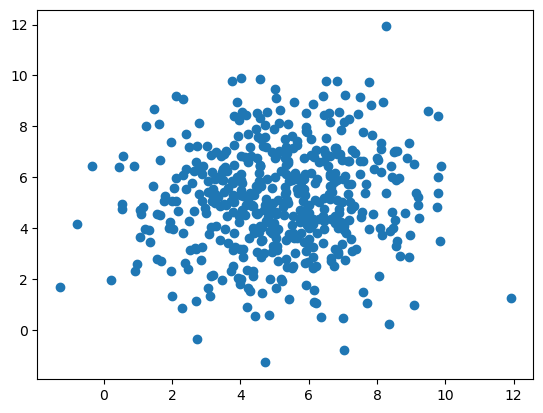

Enter number of intervals : 10
      Intervals                    Frequncy  
------------------------------------------------------------
    (-1.286-0.035]              3     
------------------------------------------------------------
    (0.035-1.356]              16     
------------------------------------------------------------
    (1.356-2.677]              39     
------------------------------------------------------------
    (2.677-3.998]              82     
------------------------------------------------------------
    (3.998-5.319]              127     
------------------------------------------------------------
    (5.319-6.64]              116     
------------------------------------------------------------
    (6.64-7.961]              72     
------------------------------------------------------------
    (7.961-9.282]              37     
------------------------------------------------------------
    (9.282-10.603]              7     
-----------------------

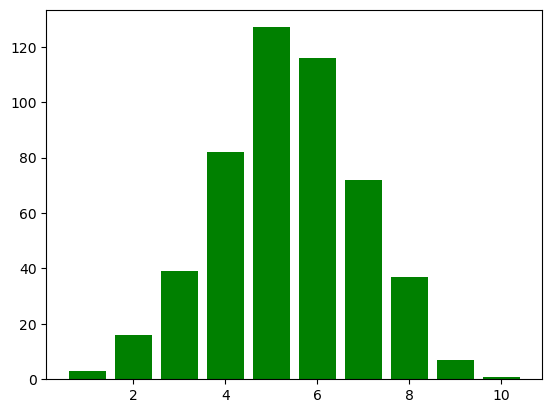

In [80]:
file_path = input("Enter file path : ")
sep = input("Enter file Separator :  ")

# step 1 :- Read the data from file
data = read_Continues_Data(file_path,sep)
print(data.count(20.003))
# min of data
min_of_data = min(data)
print("Minimum of data :  " , min_of_data)

# Max of data
max_of_data = max(data)
print("Maximum of data :  ", max_of_data)

# step 2 :- find the Mean and Variance of data
mean = mean_of_data(data)
print("mean : " , mean)

variance = variance_of_data(data,mean)
print("variance : ",variance)


# data Visualization 
# 1 . scatter Graph
scatterPlot(data)

# Number of intervals
intervals = int(input("Enter number of intervals : "))

# 2. draw bar Graph
dic1 = freq_for_graph(data,intervals)
plot_histogram(dic1,intervals)


In [70]:

# step 3 :- find out the parameter values
#x,y = find_parameters(mean,variance)
meow1,sigma_square1 =find_log_parameters(mean,variance)
no_parameters = 2
print("")
print("meow1  : ",meow1) # 
print("sigma_square1 : ",sigma_square1)


# step 4  :- Create frequecy table
frequency_Table = frequency_table(data,intervals)

# step 5  :-  merge the intervals on given threshold 
threshold_frequency = 5 
merge_intervals_table = merge_chi_intervals(frequency_Table,threshold_frequency)
print("")
print("###########################################################################################################################",sep="\n\n")
print("After merging intervals : ")
display(merge_intervals_table)
print("")

# Calculate the degree of freedom  formula : No_of_intervals - No_of_parameters -1
No_of_intervals = len(merge_intervals_table)
degree_of_freedom = No_of_intervals - no_parameters - 1
significance_level=0.05
print("Degree of freedom : ",degree_of_freedom)

# calculate chi_squre_value
chi_square_value = sum([merge_intervals_table[i][3] for i in range(len(merge_intervals_table))])
print("Chi-Square value : ",chi_square_value)

# chi_square value in table on given significate level
chi_square_value_in_table = 11.070
print("chi-Square value in table : ",chi_square_value_in_table)

if chi_square_value <= chi_square_value_in_table:
   print("Given data follows the Log Normal distribution")
else:
   print("Given data doesn't follow the Log Normal distribution")



meow1  :  1.561
sigma_square1 :  1.282


ZeroDivisionError: float division by zero

In [6]:
import numpy as np
np.random.Generator.beta(5.0, 2.0, size=2000)

TypeError: descriptor 'beta' for 'numpy.random._generator.Generator' objects doesn't apply to a 'float' object

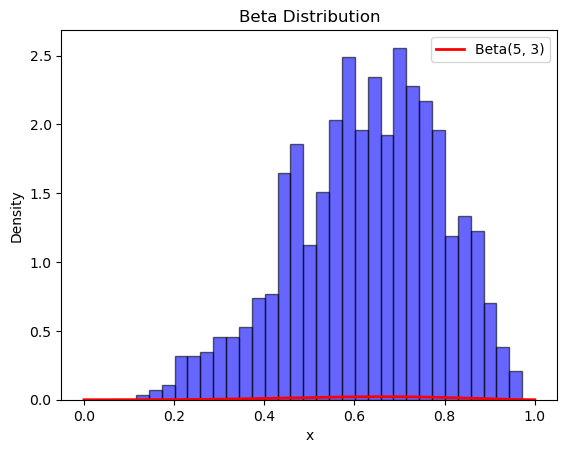

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define shape parameters (alpha and beta)
alpha = 5
beta = 3

# Generate random samples from the beta distribution
samples = np.random.beta(alpha, beta, size=1000)

# Create a histogram to visualize the distribution
plt.hist(samples, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black')

# Plot the beta distribution curve
x = np.linspace(0, 1, 5000)
y = np.power(x, alpha - 1) * np.power(1 - x, beta - 1)
plt.plot(x, y, 'r-', lw=2, label=f'Beta({alpha}, {beta})')

# Customize the plot
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Beta Distribution')
plt.legend()

# Show the plot
plt.show()


In [ ]:
d = []
i=0
while(i<10000):
    n = random.randint(1,1000)
    d.append(n)


In [92]:
random.randint(1,2)

1